In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import zscore

In [4]:
# Create a Academic performance dataset of students
data = {
    'Student_ID': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120],
    'Math_Score': [80, 75, 90, 85, 95, np.nan, 70, 88, 92, 78,
                   83, 87, 94, 72, 79, 84, 91, 89, 93, 76],
    'Science_Score': [85, 79, 92, 88, 96, 73, 78, 90, 94, 82,
                      86, 89, 93, 76, 80, 87, 91, 89, 95, 77],
    'English_Score': [78, 72, 88, 83, 90, 69, 75, 85, 89, 80,
                      84, 87, 92, 71, 76, 82, 'ABC', 86, 91, 74],  # Introduce inconsistency at index 16
    'Attendance': [True, True, True, True, False, True, True, True, True, True,
                   True, True, True, True, True, False, True, True, True, True]
}

In [5]:
data_frame = pd.DataFrame(data)

In [6]:
data_frame

,Student_ID,Math_Score,Science_Score,English_Score,Attendance
0,101,80.0,85,78,True
1,102,75.0,79,72,True
2,103,90.0,92,88,True
3,104,85.0,88,83,True
4,105,95.0,96,90,False
5,106,NaN,73,69,True
6,107,70.0,78,75,True
7,108,88.0,90,85,True
8,109,92.0,94,89,True
9,110,78.0,82,80,True


In [17]:
data_frame.describe()

,Student_ID,Math_Score,Science_Score
count,20.00000,19.000000,20.000000
mean,110.50000,84.263158,86.000000
std,5.91608,7.687234,6.920602
min,101.00000,70.000000,73.000000
25%,105.75000,78.500000,79.750000
50%,110.50000,85.000000,87.500000
75%,115.25000,90.500000,91.250000
max,120.00000,95.000000,96.000000


In [18]:
data_frame.info

<bound method DataFrame.info of     Student_ID  Math_Score  Science_Score English_Score  Attendance
0          101        80.0             85            78        True
1          102        75.0             79            72        True
2          103        90.0             92            88        True
3          104        85.0             88            83        True
4          105        95.0             96            90       False
5          106         NaN             73            69        True
6          107        70.0             78            75        True
7          108        88.0             90            85        True
8          109        92.0             94            89        True
9          110        78.0             82            80        True
10         111        83.0             86            84        True
11         112        87.0             89            87        True
12         113        94.0             93            92        True
13         114  

In [19]:
#checking for missing values
data_frame.isnull().sum()

Student_ID       0
Math_Score       1
Science_Score    0
English_Score    0
Attendance       0
dtype: int64

In [7]:
#Replacing Null values with zero
data_frame = data_frame.fillna(0)
data_frame.isnull().sum()

Student_ID       0
Math_Score       0
Science_Score    0
English_Score    0
Attendance       0
dtype: int64

In [21]:
#Finding inconsitancy in English column ABC
numeric_cols = ['English_Score']
non_numeric_values = [~data_frame['English_Score'].apply(lambda x: str(x).isdigit())]
print("\nNon-Numeric Values in Numeric Columns:")
print(non_numeric_values)


Non-Numeric Values in Numeric Columns:
[0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16     True
17    False
18    False
19    False
Name: English_Score, dtype: bool]


In [22]:
#Replacing inconsistancy with Null value
data_frame['English_Score'] = pd.to_numeric(data_frame['English_Score'], errors='coerce')
data_frame.tail(5)

,Student_ID,Math_Score,Science_Score,English_Score,Attendance
15,116,84.0,87,82.0,False
16,117,91.0,91,NaN,True
17,118,89.0,89,86.0,True
18,119,93.0,95,91.0,True
19,120,76.0,77,74.0,True


In [23]:
#Replacing NuLL value with avg scores of maths and science
#Creating a new column for avg score of Math and science
data_frame['Average_Score'] = data_frame[['Math_Score', 'Science_Score']].mean(axis=1)
#Replacing Null value with avgg score
data_frame.loc[data_frame['English_Score'].isna(), 'English_Score'] = data_frame.loc[data_frame['English_Score'].isna(), 'Average_Score']
#Deleting that avg score coloumn
data_frame.drop('Average_Score', axis=1, inplace=True)
data_frame.tail(5)

,Student_ID,Math_Score,Science_Score,English_Score,Attendance
15,116,84.0,87,82.0,False
16,117,91.0,91,91.0,True
17,118,89.0,89,86.0,True
18,119,93.0,95,91.0,True
19,120,76.0,77,74.0,True


In [24]:
# Identify numeric columns
numeric_cols = data_frame.select_dtypes(include=np.number).columns

In [25]:
# Check for outliers using z-score
z_scores = zscore(data_frame[numeric_cols])
outliers = (np.abs(z_scores) > 3).any(axis=1)

In [26]:
# Deal with outliers using winsorization
from scipy.stats.mstats import winsorize
data_frame[numeric_cols] = data_frame[numeric_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]))

In [27]:
# Print the modified DataFrame without outliers
print(data_frame)

    Student_ID  Math_Score  Science_Score  English_Score  Attendance
0          102        80.0             85           78.0        True
1          102        75.0             79           72.0        True
2          103        90.0             92           88.0        True
3          104        85.0             88           83.0        True
4          105        94.0             95           90.0       False
5          106        70.0             76           71.0        True
6          107        70.0             78           75.0        True
7          108        88.0             90           85.0        True
8          109        92.0             94           89.0        True
9          110        78.0             82           80.0        True
10         111        83.0             86           84.0        True
11         112        87.0             89           87.0        True
12         113        94.0             93           91.0        True
13         114        72.0        

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

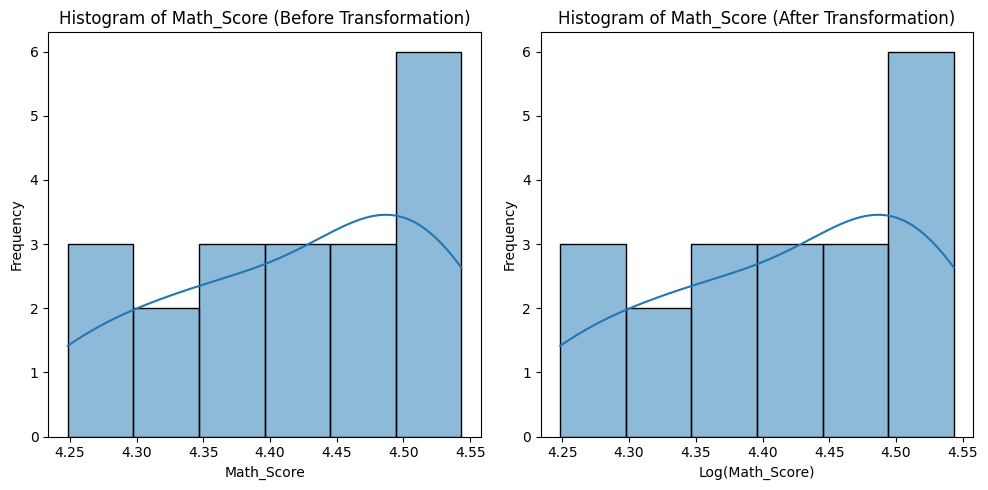

In [29]:
# Apply logarithmic transformation to 'Math_Score' after handling NaN values
data_frame['Math_Score'] = np.log(data_frame['Math_Score'].dropna())

# Plot histogram before and after transformation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_frame['Math_Score'].dropna(), kde=True)
plt.title('Histogram of Math_Score (Before Transformation)')
plt.xlabel('Math_Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data_frame['Math_Score'], kde=True)
plt.title('Histogram of Math_Score (After Transformation)')
plt.xlabel('Log(Math_Score)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()